#GAME-THEORETIC ANALYSIS OF COOPERATOR AND CHEATER YEAST STRAINS

Import some required modules

In [94]:
from __future__ import division
%matplotlib inline
import sys, imp

The following line increases the width of the notebook ([source](http://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-ipython-notebook-in-my-browser))

In [95]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

## Steady-State Analysis

###Create heatmaps for cost and gams results


--------------- Histin games, no glc ------------


--- Nash equilibria ---

Nash equilibria of the systems are:
Known:
(('Cooperator', 'Defector'),)  -->  151
(('Defector', 'Defector'),)  -->  71
(('Cooperator', 'Cooperator'),)  -->  849

Unknown:

data_value =  {"Prisoner's\nDilemma": 0, 'Mutually\nBeneficial': 1, 'Snowdrift': 2}

min(data) = 0.0  , max(data) = 2.0
The figure was saved into results/figures/ss_game_results_his_noGlc_NEs.pdf

min(dataX_C) = 1.84915023924e-30  , max(dataX_C) = 1.0
min(dataX_D) = 7.53212558741e-30  , max(dataX_D) = 1.0
The figure was saved into results/figures/ss_game_results_his_noGlc_freq_Cinvades.pdf

The figure was saved into results/figures/ss_game_results_his_noGlc_freq_Dinvades.pdf


--------------- Histin games, glc ------------


--- Nash equilibria ---

Nash equilibria of the systems are:
Known:
(('Cooperator', 'Defector'),)  -->  125
(('Defector', 'Defector'),)  -->  176
(('Cooperator', 'Cooperator'),)  -->  757

Unknown:
(('Defector', 'Defec

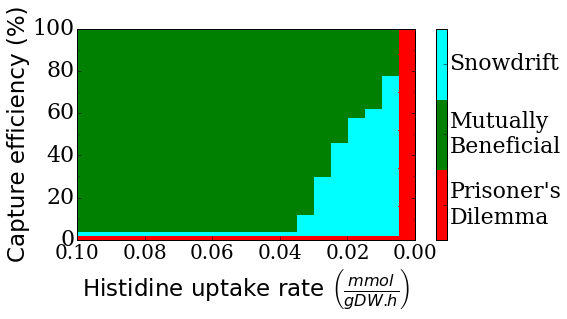

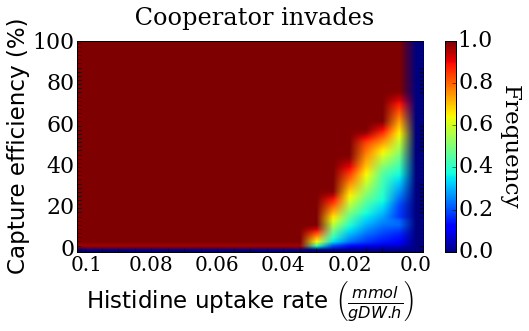

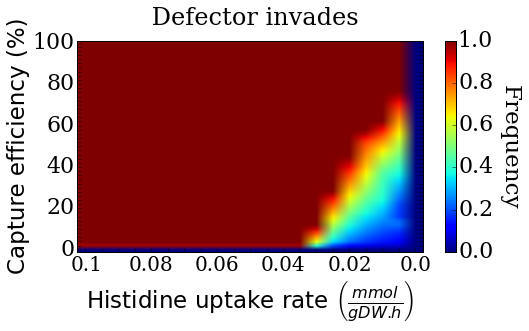

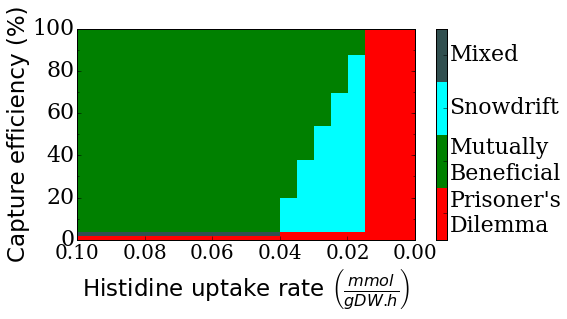

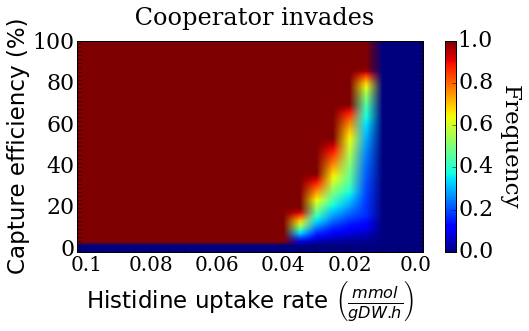

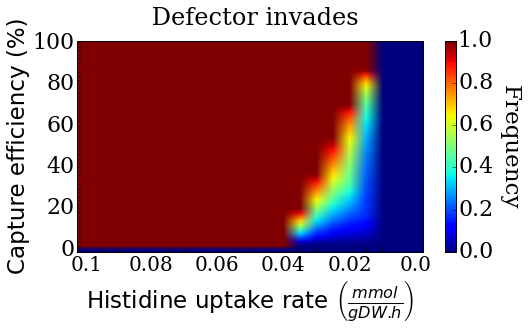

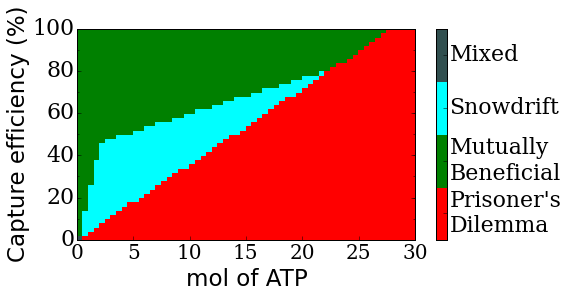

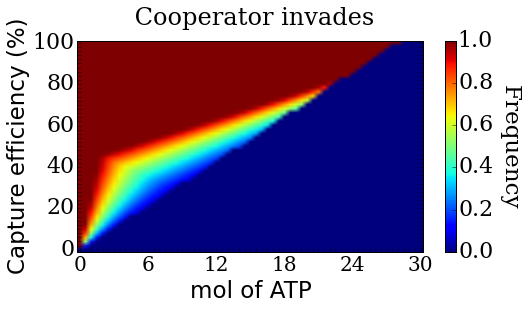

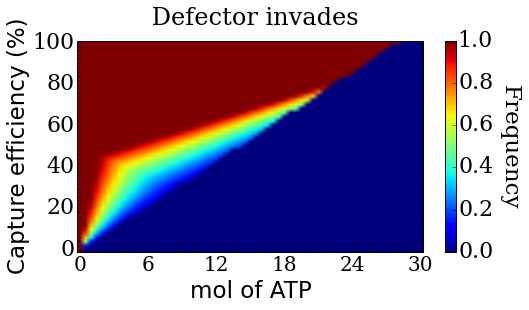

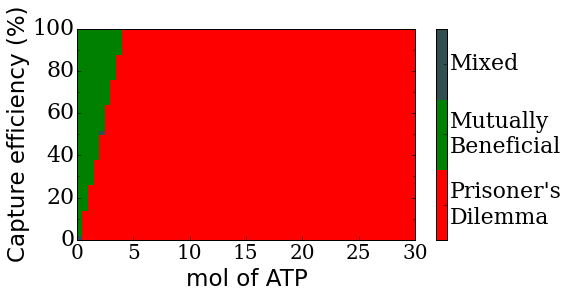

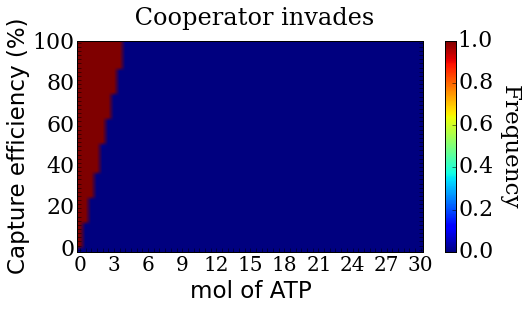

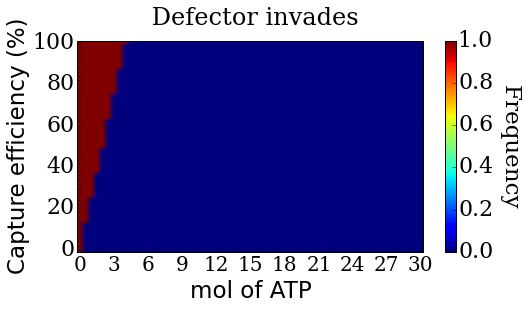

In [96]:
import simulate_games  # Use in the first ruh
import tools.utilities.plot  # Use in the first run
imp.reload(sys.modules['simulate_games'])
imp.reload(sys.modules['tools.utilities.plot'])
from simulate_games import run_plot_results
from tools.utilities.plot import plot
run_plot_results()


--------------- Histin games, no glc ------------


--- Nash equilibria ---

Nash equilibria of the systems are:
Known:
(('Cooperator', 'Defector'),)  -->  151
(('Defector', 'Defector'),)  -->  71
(('Cooperator', 'Cooperator'),)  -->  849

Unknown:

data_value =  {'Mutually beneficial': 1, 'Snowdrift': 2, "Prisoner's Dilemma": 0}

min(data) = 0.0  , max(data) = 2.0
The figure was saved into results/figures/ss_game_results_his_noGlc_NEs.pdf

min(dataX_C) = 1.84915023924e-30  , max(dataX_C) = 1.0
min(dataX_D) = 7.53212558741e-30  , max(dataX_D) = 1.0
The figure was saved into results/figures/ss_game_results_his_noGlc_freq_Cinvades.pdf

The figure was saved into results/figures/ss_game_results_his_noGlc_freq_Dinvades.pdf


--------------- Histin games, glc ------------


--- Nash equilibria ---

Nash equilibria of the systems are:
Known:
(('Cooperator', 'Defector'),)  -->  125
(('Defector', 'Defector'),)  -->  176
(('Cooperator', 'Cooperator'),)  -->  757

Unknown:
(('Defector', 'Defecto

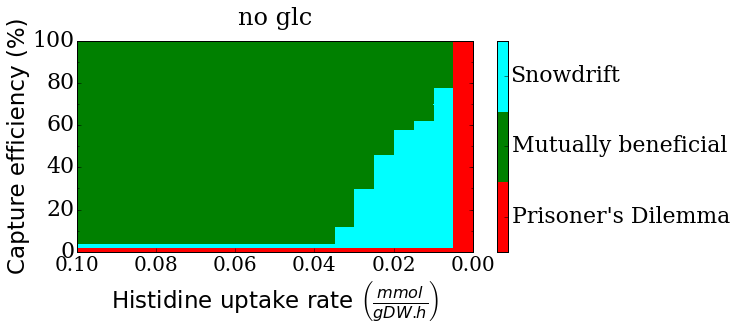

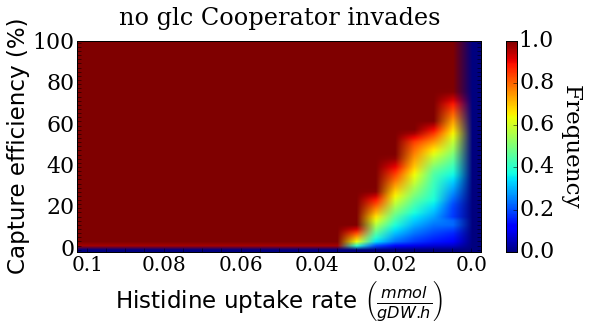

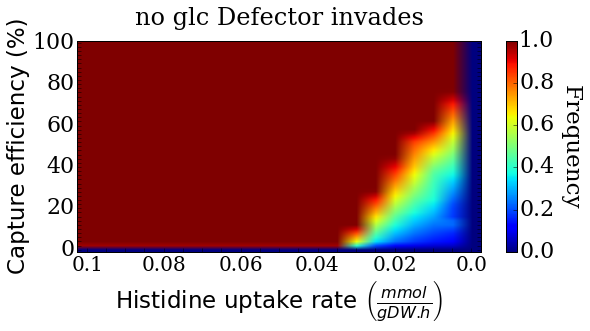

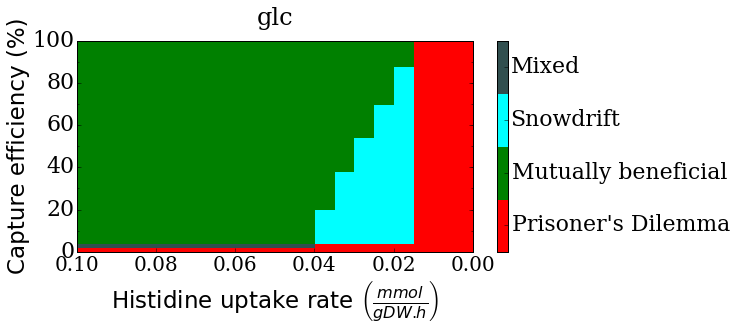

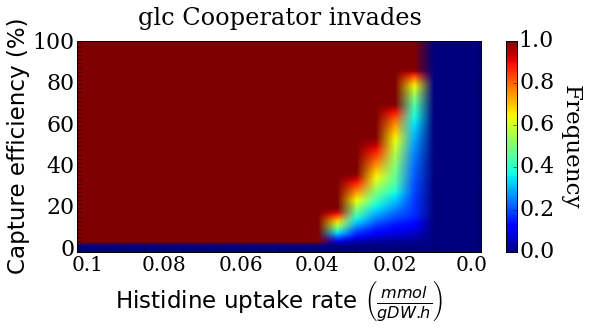

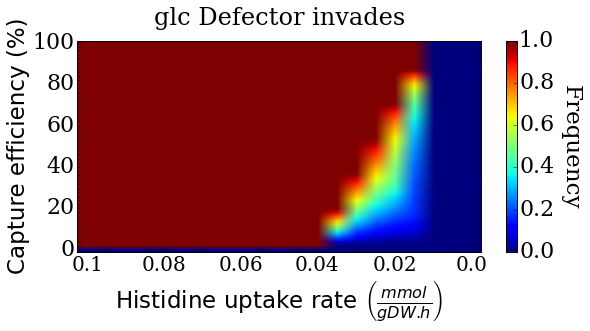

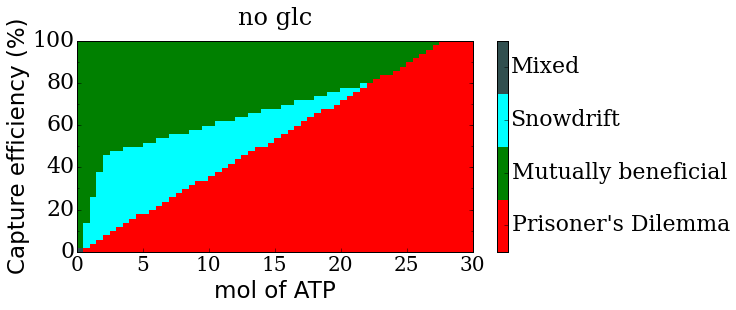

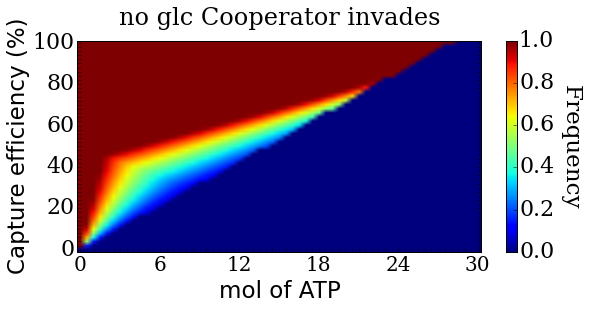

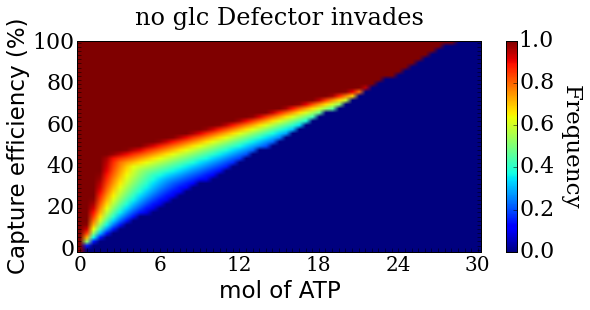

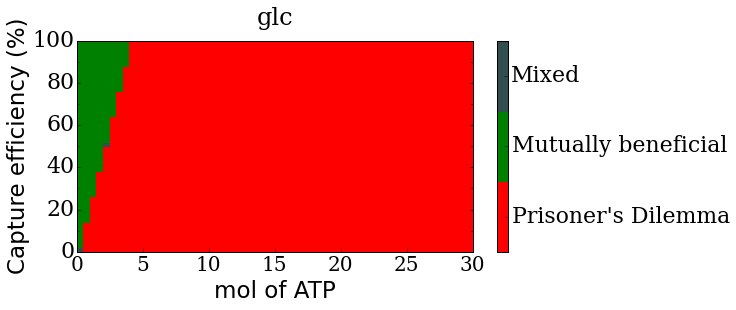

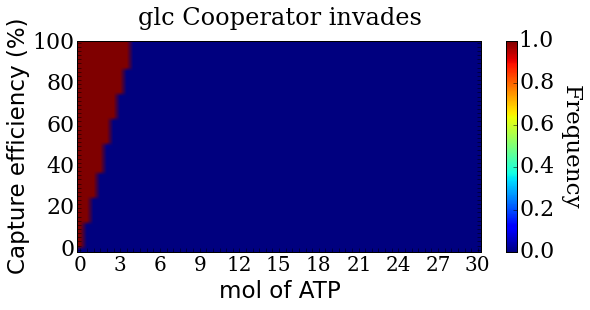

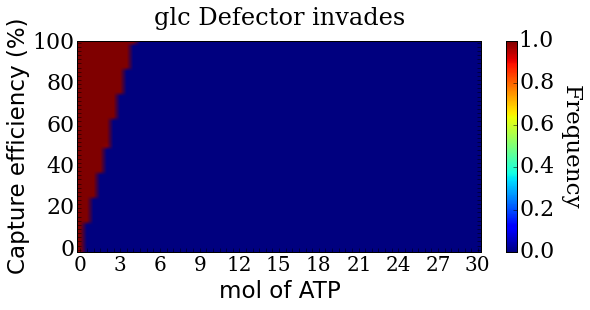

In [87]:
import simulate_games  # Use in the first ruh
import tools.utilities.plot  # Use in the first run
imp.reload(sys.modules['simulate_games'])
imp.reload(sys.modules['tools.utilities.plot'])
from simulate_games import run_plot_results
from tools.utilities.plot import plot
run_plot_results()

##Dynamic Analysis

First import necessary functions and modules

In [3]:
import sys, imp
import matplotlib
%matplotlib inline
import dynamicAnalysis
import tools.ancillary.plot

###Data from Jeff Gore's experiments

Initial sucrose concentration = 5% = 1.46 $(mM)$ [1]

Initial cell concentration = 150000 $\left(\frac{cells}{ml}\right)$ (tests were prformed in 5 $ml$ batch culture) [1]

Lag phase time = 3 h [2]

Specific growth rate for slow growth phase  = 0.31 $h^{-1}$ [2]

Specific growth rate for slow growth phase  = 0.47 $h^{-1}$ [2]

**References**:

[[1](http://www.ncbi.nlm.nih.gov/pubmed/19349960)]

[[2](http://www.ncbi.nlm.nih.gov/pubmed/23637571)]

### Identifying saturating histidine concentraiton according to the uptake kinetics equation

Here, we define the saturation concentration as a concnetraiton at which the calculated uptake rate (using an uptake kinetic equation) is at least 90% of its maximum according to uptake kinetics. The kinetics of histidine uptake rate is as follows according to [PMID: 9473505](http://www.ncbi.nlm.nih.gov/pubmed/9473505):

$$v_{histidine}^{uptake} = \frac{0.066S}{(0.017 + S)} + \frac{0.0525S}{(0.370 + S)}$$

From Jeff Gore's paper the saturation concentration is 20 $\mu$g/ml or 0.129 mmol/l

See the definition of function findHisSatConc in dynamicAnalysis.py for details

Saturated histidine concentration according to uptake kinetics = 1.4 --> Uptake rate = 0.106733610038

Reported saturated histidiine concentration in Gore's paper = 0.129 --> Uptake rate = 0.0718872127817


1.4000000000000001

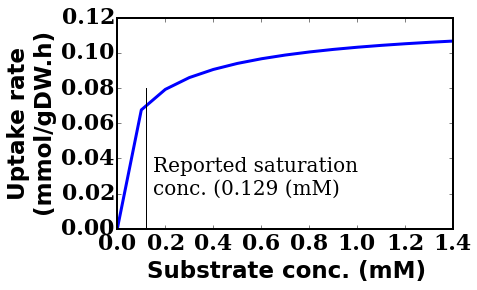

In [38]:
imp.reload(sys.modules['dynamicAnalysis'])
imp.reload(sys.modules['tools.ancillary.plot'])
from dynamicAnalysis import findHisSatConc

findHisSatConc(Smax = 100, S_step = 0.1, tol = 0.9, output_filename = 'his_sat_conc.pdf')


### Identifying saturated sucrose cocnetration according to the uptake kinetics equation

Sucrose uptake rate is as follows (Sources: [ref 1](http://www.sciencedirect.com/science/article/pii/0003986182902557), [ref 2](http://www.sciencedirect.com/science/article/pii/0922338X94901546), [ref 3](http://www.sciencedirect.com/science/article/pii/0922338X9685029X), [PMID: 16232731](http://www.ncbi.nlm.nih.gov/pubmed/16232731)):

$$v_{uptake}^{sucrose} = \frac{0.12S}{120 + S}, \,\, if \, S <= 12.5$$
$$v_{uptake}^{sucrose} = \frac{0.12S}{7.95 + S}, \,\, if \, S > 12.5$$

(see the definition of function assign_uptakeKinetics for more detials)

NOTE: 
% Concentraiton is $\frac{g}{ml}$ for solids and $\frac{ml}{ml}$ for liquids. 

Converting % cocnentration to mM concentraiton works as follows ([Source](http://abacus.bates.edu/~ganderso/biology/resources/dilutions.html)).
If the MW represents the molecular weight of that compounds:

$$molarity = \frac{X/100 \, g}{100 \, ml} \times \frac{1000 \, ml}{1 \, l} \times \frac{1 \, mol}{ MW \, g} = \frac{0.01X}{MW} \, \frac{mol}{l} = \frac {0.01X}{MW} \, M$$

Example: A sucrose concentration = 5% used in [Jeff Gore experiments](http://www.ncbi.nlm.nih.gov/pubmed/19349960) is equivalent to: 

$$ \frac{0.01 \times 5}{342.2965} = 0.00146 \, \frac{mol}{l} = 1.46 \, \frac{mmol}{L} = 1.46 \, mM $$

First we examine the satudated sucrose concentraiton according to the uptake kientic equation. Similarly to histidiine, we define the saturation concentration as a concnetraiton at which the calculated uptake rate (using an uptake kinetic equation) is at least 90% of its maximum according to uptake kinetics.

Saturated sucrose concentration according to uptake kinetics = 71.6 --> Uptake rate = 0.108007542426 (90.01% of Vmax = 0.12)

Reported used sucrose concentration in Gore's paper = 1.46 --> Uptake rate = 0.00144245018936 (1.20% of Vmax = 0.12)


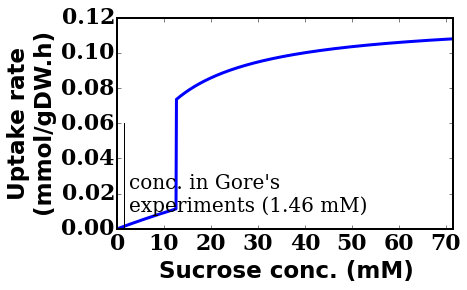

In [39]:
imp.reload(sys.modules['dynamicAnalysis'])
imp.reload(sys.modules['tools.ancillary.plot'])
from dynamicAnalysis import findSucSatConc

findSucSatConc(uptake_kinetics_type = 'conditional',tol = 0.9, output_filename = 'results/suc_sat_conc_conditional.pdf')

Now, if we used the following uptake kinetics combining the two parts of the uptake kinetics given earlier:

$$v_{uptake}^{sucrose} = \frac{0.12S}{120 + S} + \frac{0.12S}{7.95 + S}$$


instead of the conditional uptake kinetics

Saturated sucrose concentration according to uptake kinetics = 100.1 --> Uptake rate = 0.165745947374 (69.06% of Vmax = 0.24)

Reported used sucrose concentration in Gore's paper = 1.46 --> Uptake rate = 0.0200609411564 (8.36% of Vmax = 0.24)


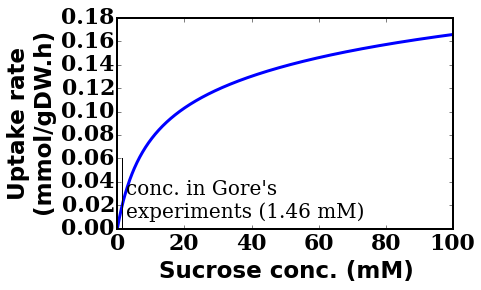

In [40]:
imp.reload(sys.modules['dynamicAnalysis'])
imp.reload(sys.modules['tools.ancillary.plot'])
from dynamicAnalysis import findSucSatConc

findSucSatConc(uptake_kinetics_type = 'combined', tol = 0.9, output_filename = 'results/suc_sat_conc_combined.pdf')

Next, we use the metabolic model to find out what the minimum required sucrose uptake in order to get a feasible FBA solution given a fixed ATP cost determined by experiments (a cost of 0.115 for SUCRe reaction reduces the biomass flux by 2.5% as reported in [Gore's paper](http://www.ncbi.nlm.nih.gov/pubmed/19349960)) and for various capture efficiencies

Using conditional sucrose uptake kinetics as follows:

$$v_{uptake}^{sucrose} = \frac{0.12S}{120 + S}, \,\, if \, S <= 12.5$$
$$v_{uptake}^{sucrose} = \frac{0.12S}{7.95 + S}, \,\, if \, S > 12.5$$


V_Jeff = 0.00144245018936 --> No capture efficiency is less than V_Jeff (min ms = 0.0295115832964
V_high = 0.0545454545455 --> (min capture eff,ms) = (55.00000000000003, 0.0538068334679)



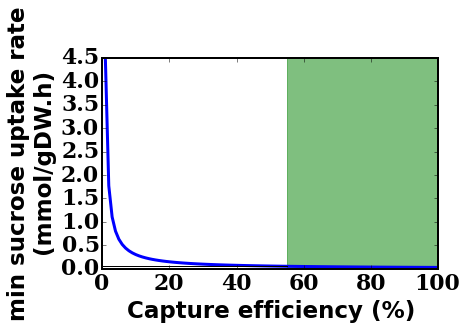

In [35]:
imp.reload(sys.modules['dynamicAnalysis'])
imp.reload(sys.modules['tools.ancillary.plot'])
from dynamicAnalysis import find_min_sucrose_uptake, plot_min_suc_uptake_results

#capture_eff_vec, ms_vec = find_min_sucrose_uptake(uptake_kinetics_type = 'conditional', output_filename = 'results/suc_min_capture_eff_conditional.pdf')

plot_min_suc_uptake_results(capture_eff_vec, ms_vec, uptake_kinetics_type = 'conditional', output_filename = 'results/suc_min_capture_eff_conditional.pdf')

Using combined sucrose uptake kinetics as follows:

$$v_{uptake}^{sucrose} = \frac{0.12S}{120 + S} + \frac{0.12S}{7.95 + S}$$


V_Jeff = 0.0200609411564 --> No capture efficiency is less than V_Jeff (min ms = 0.0295115832964
V_high = 0.165708029812 --> (min capture eff,ms) = (19.000000000000004, 0.157604412924)



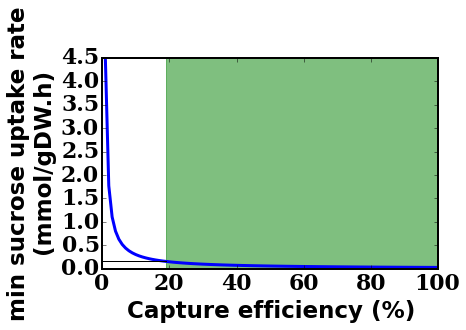

In [36]:
plot_min_suc_uptake_results(capture_eff_vec, ms_vec, uptake_kinetics_type = 'combined', output_filename = 'results/suc_min_capture_eff_combined.pdf')

It is worth noting that accordiing to [this paper](http://www.sciencedirect.com/science/article/pii/0006300262905267) the glucose capture efficiency yeast when growing on sucrose is approximately 66% (see Fig. 2 of that paper).

###Impact of the population density on the satiblity of cooperators

Here, we actually examine the ecologicla stability of the population

The first experimental observation (according to [PMID: 19349960](http://www.ncbi.nlm.nih.gov/pubmed/19349960)) is that the growth rate of a population of pure cooperators at high cell density is higher than that at low cell density.

Function coopr_density_effect_on_mu in dynamicAnalysis.py examines this behavior.

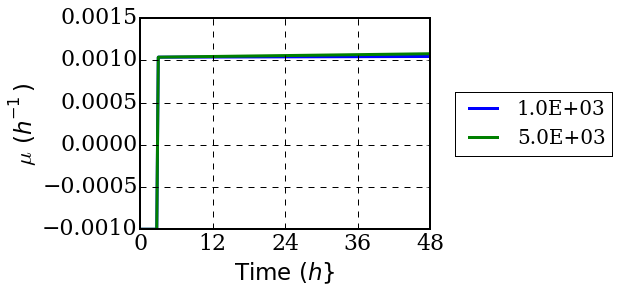

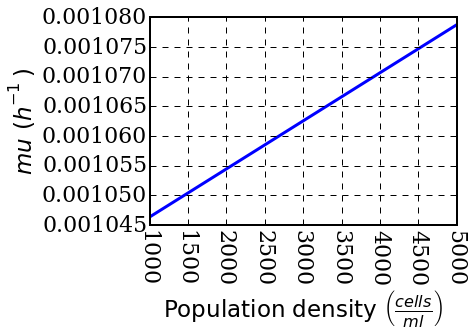

In [38]:
imp.reload(sys.modules['dynamicAnalysis'])
imp.reload(sys.modules['tools.ancillary.plot'])

from dynamicAnalysis import plot_density

plot_density(results_filename = 'results/dynamic_coopr_density_effect_on_mu.py' ,output_filename = 'results/coopr_density_effect_on_mu.pdf')
                                                                                                      

###Check whether a small fraction of cheaters can invade a population of cooperators and vice versa

Here, we examine the observation reported in [Jeff Gore's paper](http://www.ncbi.nlm.nih.gov/pubmed/19349960) that a small fraction of cheaters can invade a population of cooperators and vice versa.

Simulations are performed using function coopr_cheater_invade in dynamicAnalysis

First, check if a small fraction of cheaters can invade a population of cooperators